In [1]:
import sys, traceback
import cv2
import os
import re
import numpy as np
import argparse
import string
from plantcv import plantcv as pcv
import glob
import os

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
pcv.params.debug = 'plot' 

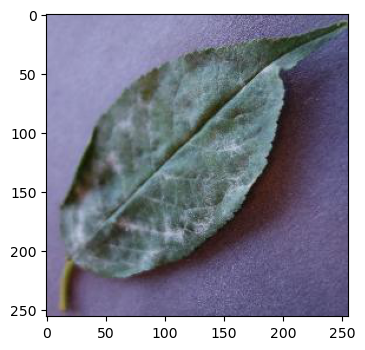

In [3]:
images = glob.glob('../resources/Plant_leave_diseases_dataset_without_augmentation/Cherry*/*')
img=images[20]
img, path, filename = pcv.readimage(img)

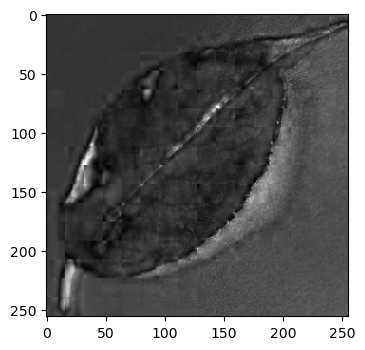

In [4]:
device = 0
s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')

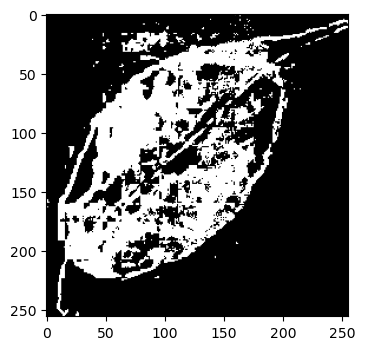

In [5]:
s_thresh = pcv.threshold.binary(gray_img=s, threshold=50, max_value=255, object_type='dark')

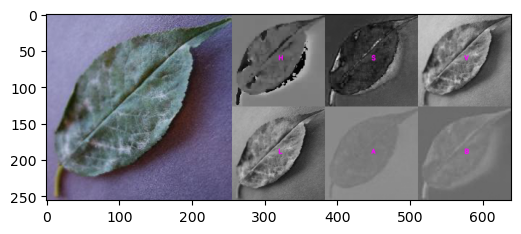

In [6]:
# Analyze Color

analysis_image = pcv.visualize.colorspaces(rgb_img=img)

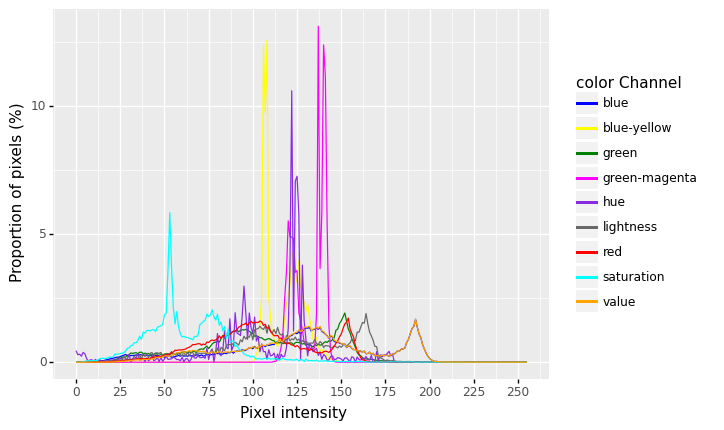

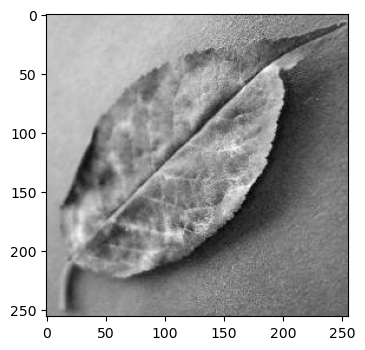

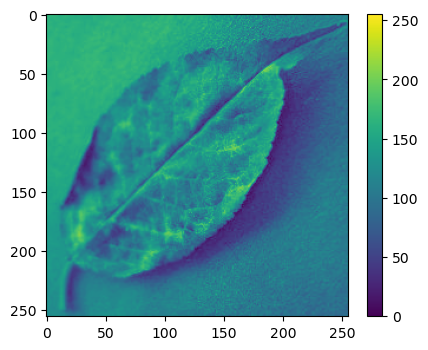

Figure(600x400)


In [16]:
color_histogram = pcv.analyze_color(rgb_img=img, mask=None, colorspaces='all', label="default")
hue_circular_mean = pcv.outputs.observations['default']['hue_circular_mean']['value']
# gray_img = pcv.rgb2gray(img)
gray_img = pcv.rgb2gray_lab(rgb_img=img, channel='l')

pseudo_img = pcv.visualize.pseudocolor(gray_img=gray_img, obj=None, mask=None, cmap='viridis',
                                       min_value=0, max_value=255)
print(pseudo_img)

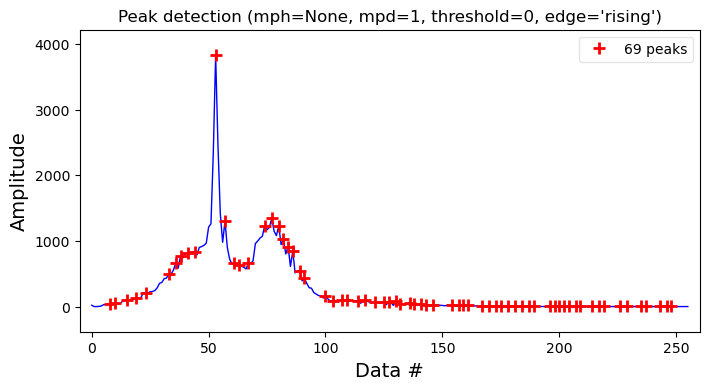

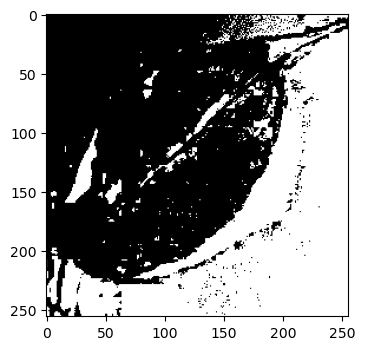

Threshold value = 60


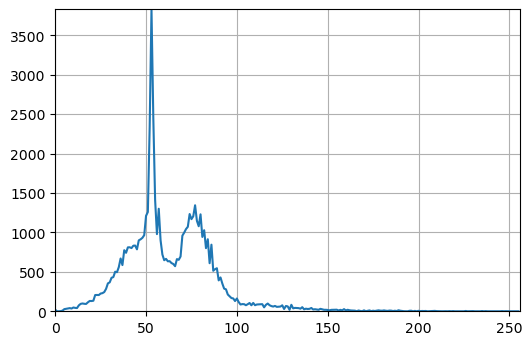

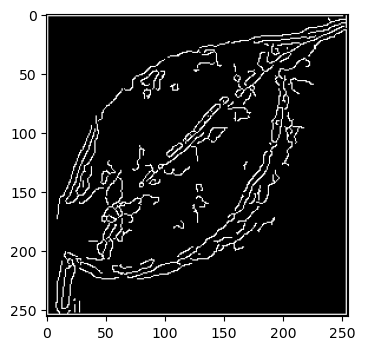

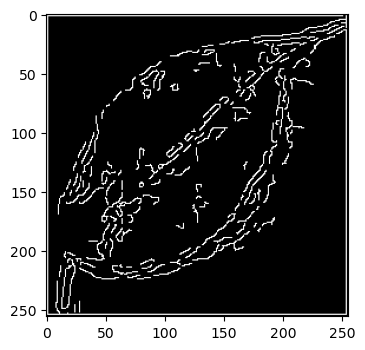

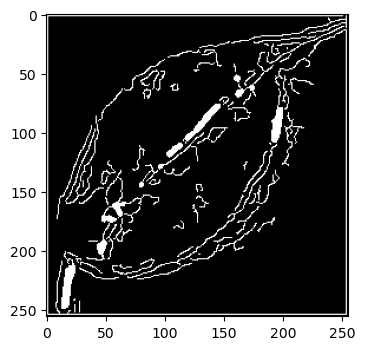

In [8]:
triangle_thresh = pcv.threshold.triangle(gray_img=s, max_value=255, 
                                         object_type='light', xstep=1)
edges4 = pcv.canny_edge_detect(img=s, sigma=1.3)
fill_image = pcv.fill(bin_img=edges4, size=5)
fill_image = pcv.fill_holes(bin_img=edges4)


In [9]:
id_objects, obj_hierarchy = pcv.find_objects(img=s, mask=None)


TypeError: Expected Ptr<cv::UMat> for argument 'image'